### 목표 : 미니배치 기반 기계학습 진행 실습
- 확률적 경사하강법 (SGD) 기반의 알고리즘 적용 모델
- 배치 경사하강법 (BGD) 비해 다소 부정확할 수 있지만, 속도가 훨씬 빠름
- 데이터의 처음부터 끝까지 (에포크) 학습 후, 가중치(W)와 절편(b) 업데이트 하는 방식에서 에포크를 미니배치 크기만큼 나누어서 학습 후 가중치(W)와 절편(b) 업데이트 진행 함
- 장점
    - 온라인 학습, 즉 점진적 학습 가능 => partial_fit() : 기존 모델에 추가로 1에포크 학습
    - 기존의 다른 모델보다 학습속도가 빠름 => 랜덤으로 한 개 데이터 추출 후 학습 진행
    - 조기 학습 중단 설정 가능
- 단점
    - 전체 학습보다 정확도는 떨어질 수 있음!

(1) 모듈 로딩 및 데이터 준비

In [1]:
# 모듈 로딩
import pandas as pd

filename = '../DATA/iris.csv'

In [2]:
# 데이터 로딩
fishDF = pd.read_csv(filename)
fishDF.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(2) 데이터 전처리 => 학습을 위한 가공

In [3]:
# (2-1) 피쳐/타겟 분리
featureDF = fishDF[fishDF.columns[:-1]]
targetSR = fishDF['species']

featureDF.shape, targetSR.shape

((150, 4), (150,))

In [4]:
# (2-2) 학습/테스트 데이터셋 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    stratify=targetSR,
                                                    random_state=41)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((112, 4), (112,), (38, 4), (38,))

In [5]:
# (2-3) 피쳐 스케일링
from sklearn.preprocessing import StandardScaler

sdScaler = StandardScaler()
sdScaler.fit(x_train)

# 훈련용 데이터셋 스케일링
scaled_x_train = sdScaler.transform(x_train)
# 테스트용 데이터셋 스케일링
scaled_x_test = sdScaler.transform(x_test)

(3) 학습 진행 <hr>
- 학습 방법 : 확률적 경사하강법 (SGD) 기반의 분류

In [27]:
# 모델 인스턴스 생성
from sklearn.linear_model import SGDRegressor, SGDClassifier

# penalty 파라미터 : 과대적합 방지, 가중치 규제 방식
# alpha   파라미터 : penalty 적용 강도 설정 (값이 커질수록 규제도 강함)
model1 = SGDClassifier(random_state=41, verbose=True, loss='log_loss', n_iter_no_change=7, alpha=0.0001)
model1.fit(scaled_x_train, y_train)

-- Epoch 1
Norm: 14.42, NNZs: 4, Bias: -3.830381, T: 112, Avg. loss: 0.024669
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 13.11, NNZs: 4, Bias: -3.874694, T: 224, Avg. loss: 0.000051
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 12.03, NNZs: 4, Bias: -3.927205, T: 336, Avg. loss: 0.000068
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 11.12, NNZs: 4, Bias: -3.984366, T: 448, Avg. loss: 0.000090
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 10.36, NNZs: 4, Bias: -4.031797, T: 560, Avg. loss: 0.000129
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.73, NNZs: 4, Bias: -4.076174, T: 672, Avg. loss: 0.000170
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.18, NNZs: 4, Bias: -4.115277, T: 784, Avg. loss: 0.000197
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 8.71, NNZs: 4, Bias: -4.164883, T: 896, Avg. loss: 0.000237
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.33, NNZs: 4, Bias: -4.194982, T: 1008, Avg. loss: 0.000295
Total training time: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


SGDClassifier(loss='log_loss', n_iter_no_change=7, random_state=41,
              verbose=True)

In [28]:
train_score1 = model1.score(scaled_x_train, y_train)
test_score1 = model1.score(scaled_x_test, y_test)

In [29]:
train_score1, test_score1

(0.9642857142857143, 0.9736842105263158)

In [9]:
# 학습 후 설정된 파라미터 즉 모델 파라미터
print(f'n_iter_ : {model1.n_iter_}')

n_iter_ : 51


In [10]:
## 1에포크씩 점진적으로 학습 진행 => partial_fit()
model2 = SGDClassifier(loss='log_loss')
model2.partial_fit(scaled_x_train, y_train, y_train.unique())

SGDClassifier(loss='log_loss')

In [11]:
train_score2 = model2.score(scaled_x_train, y_train)
test_score2 = model2.score(scaled_x_test, y_test)

In [12]:
train_score2, test_score2

(0.8571428571428571, 0.868421052631579)

In [13]:
train_score, test_score = [], []
for n in range(100):
    model2.partial_fit(scaled_x_train, y_train, y_train.unique())   # 누적학습
    train_score2 = model2.score(scaled_x_train, y_train)
    test_score2 = model2.score(scaled_x_test, y_test)
    
    # print(f'[{n}번 학습] [기본 SGD] 학습 점수 : {train_score2:.4f}, 테스트 점수 : {test_score2:.4f}')
    train_score.append(train_score2)
    test_score.append(test_score2)
    
    # if abs(test_score2 - train_score2) >= 0.03:
    #     break

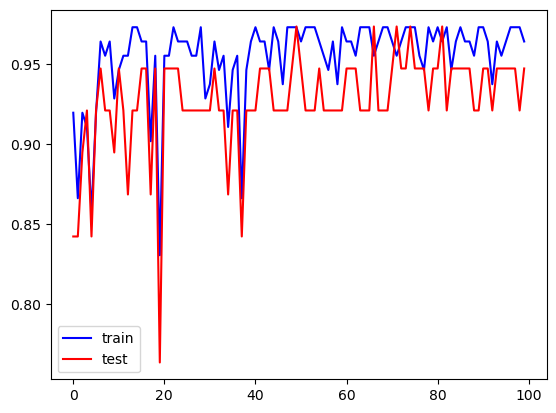

In [14]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, 'b-', label='train')
plt.plot(test_score, 'r-', label='test')
plt.legend()
plt.show()